In [ ]:
import pandas as pd
import numpy as np

# 读取CSV文件
df = pd.read_csv('/content/drive/MyDrive/CollectedData_Bruce_30_1a.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
print(numbers)

          0
match     0
2        27
3        85
4       105
5       143
6       163
7       192
8       240
9       311
10      418
11      427
12      436
13      477
14      550
15      582
16      630
17      807
18      888
19      916
20     1036
21     1045


In [ ]:
def list_info_with_nan(data):
    results = []
    for sublist in data:
        #total_length = len(sublist)  # Get the total length of the sublist
        non_nan_count = np.count_nonzero(~np.isnan(sublist))  # Count non-nan elements
        results.append(non_nan_count)
    return results


In [ ]:
summing_length=[]

In [ ]:
overall_performance=[]

In [ ]:
threshold=9

In [ ]:
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)

In [ ]:
print(numbers.iloc[:, 0].tolist())

[27, 85, 105, 143, 163, 192, 240, 311, 418, 427, 436, 477, 550, 582, 630, 807, 888, 916, 1036, 1045]


In [ ]:
int_list=numbers.iloc[:, 0].tolist()

In [ ]:
string_list = list(map(str, int_list))

# Output the string list
print(string_list)

['27', '85', '105', '143', '163', '192', '240', '311', '418', '427', '436', '477', '550', '582', '630', '807', '888', '916', '1036', '1045']


In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/Biphasic_30_Hz_channel_1_aDLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]

# 输出结果
print(selected_data)

     scorer DLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000  \
29       27                                  937.5228881835938      
87       85                                  934.6981201171875      
107     105                                  937.8074951171875      
145     143                                  936.8434448242188      
165     163                                  936.7037963867188      
194     192                                  938.6181030273438      
242     240                                  939.4938354492188      
313     311                                  938.7760620117188      
420     418                                  942.9303588867188      
429     427                                  908.6769409179688      
438     436                                  942.9085083007812      
479     477                                  943.2520751953125      
552     550                                        943.2578125      
584     582                       

In [ ]:
df_float = selected_data.apply(pd.to_numeric)

In [ ]:
import pandas as pd


# Calculate the percentage of values smaller than 1 for each column
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)

# Output the filtered DataFrame
print(df_filtered)

      scorer  DLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000  \
29        27                                         937.522888       
87        85                                         934.698120       
107      105                                         937.807495       
145      143                                         936.843445       
165      163                                         936.703796       
194      192                                         938.618103       
242      240                                         939.493835       
313      311                                         938.776062       
420      418                                         942.930359       
429      427                                         908.676941       
438      436                                         942.908508       
479      477                                         943.252075       
552      550                                         943.257812       
584   

In [ ]:
out_df=df_filtered.iloc[:,1:]

In [ ]:
import math

def euclidean_distance(point1, point2):
    """
    Calculates the Euclidean distance between two points.

    Args:
        point1 (tuple): Tuple containing the x and y coordinates of the first point.
        point2 (tuple): Tuple containing the x and y coordinates of the second point.

    Returns:
        float: Euclidean distance between the two points.
    """
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

# Example usage:
point_a = (1, 2)
point_b = (4, 6)
distance = euclidean_distance(point_a, point_b)
print("Euclidean distance between point A and point B:", distance)

Euclidean distance between point A and point B: 5.0


In [ ]:
# Example usage:
point_a = (734.5070190429688, 490.9391479492188	)
point_b = (736.9017994, 494.0877807)
distance = euclidean_distance(point_a, point_b)
print("Euclidean distance between point A and point B:", distance)

Euclidean distance between point A and point B: 3.955864148035729


In [ ]:
euclidean_distance((out_df.iloc[0,1],out_df.iloc[0,0]),(df_float_origin.iloc[0,1],df_float_origin.iloc[0,0]))

13.061714908483829

In [ ]:
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(20):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]
print(counts)
result = list_info_with_nan(count_list)
summing_length=result
overall_performance=counts
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

[11, 16, 19, 18, 20, 20, 20, 19, 19, 19]
[55.0, 80.0, 95.0, 90.0, 100.0, 100.0, 100.0, 95.0, 95.0, 95.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CollectedData_Bruce_30_1b.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
print(numbers)

         0
match    0
2       25
3       47
4       64
5       69
6       76
7       86
8       90
9       96
10     109
11     116
12     169
13     179
14     182
15     213
16     249
17     336
18     376
19     434
20     444
21     448


In [ ]:
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)

In [ ]:
int_list=numbers.iloc[:, 0].tolist()

In [ ]:
string_list = list(map(str, int_list))

# Output the string list
print(string_list)

['25', '47', '64', '69', '76', '86', '90', '96', '109', '116', '169', '179', '182', '213', '249', '336', '376', '434', '444', '448']


In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/Biphasic_30_Hz_channel_1_bDLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]

# 输出结果
print(selected_data)

    scorer DLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000  \
27      25                                  954.4640502929688      
49      47                                     955.3017578125      
66      64                                  955.7010498046875      
71      69                                  956.3761596679688      
78      76                                  945.9129638671875      
88      86                                  934.6372680664062      
92      90                                  934.5695190429688      
98      96                                  934.0167236328125      
111    109                                   932.601806640625      
118    116                                  931.4714965820312      
171    169                                   932.069091796875      
181    179                                   931.629638671875      
184    182                                  931.6143798828125      
215    213                                  931.

In [ ]:
df_float = selected_data.apply(pd.to_numeric)

In [ ]:
# Calculate the percentage of values smaller than 1 for each column
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)

# Output the filtered DataFrame
print(df_filtered)

     scorer  DLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000  \
27       25                                         954.464050       
49       47                                         955.301758       
66       64                                         955.701050       
71       69                                         956.376160       
78       76                                         945.912964       
88       86                                         934.637268       
92       90                                         934.569519       
98       96                                         934.016724       
111     109                                         932.601807       
118     116                                         931.471497       
171     169                                         932.069092       
181     179                                         931.629639       
184     182                                         931.614380       
215     213         

In [ ]:
out_df=df_filtered.iloc[:,1:]

In [ ]:
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(20):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)


[19, 20, 19, 0, 20, 15, 14, 20, 19, 19]
[95.0, 100.0, 95.0, 0, 100.0, 100.0, 93.33333333333333, 100.0, 95.0, 95.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CollectedData_Bruce_30_6a.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/Biphasic_30_Hz_channel_6_aDLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
print(counts)
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['22', '32', '34', '39', '79', '106', '124', '130', '139', '150', '212', '224', '253', '258', '277', '332', '339', '383', '429', '442']
[20, 19, 19, 14, 20, 15, 10, 19, 20, 20]
[100.0, 95.0, 95.0, 73.6842105263158, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CollectedData_Bruce_30_6b.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/Biphasic_30_Hz_channel_6_bDLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['0', '12', '45', '73', '107', '132', '184', '211', '225', '247', '324', '366', '394', '414', '461', '490', '501', '517', '519', '534']
[19, 20, 20, 20, 19, 20, 19, 17, 20, 19]
[95.0, 100.0, 100.0, 100.0, 95.0, 100.0, 95.0, 85.0, 100.0, 95.0]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CollectedData_Bruce_60_1a.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/Biphasic_60_Hz_channel_1_aDLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
print(counts)
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['31', '32', '92', '154', '294', '455', '508', '696', '728', '762', '848', '850', '852', '870', '881', '900', '912', '920', '940', '957']
[19, 20, 18, 19, 20, 20, 3, 20, 20, 20]
[95.0, 100.0, 90.0, 95.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CollectedData_Bruce_60_1b.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/Biphasic_60_Hz_channel_1_bDLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
print(counts)
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['42', '50', '58', '80', '117', '154', '163', '179', '223', '228', '233', '239', '363', '412', '415', '443', '455', '457', '467', '472']
[19, 20, 20, 0, 20, 15, 4, 20, 19, 19]
[95.0, 100.0, 100.0, 0, 100.0, 100.0, 100.0, 100.0, 95.0, 95.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CollectedData_Bruce_60_6a.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/Biphasic_60_Hz_channel_6_aDLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
# Count all NaNs in the DataFrame
total_nans = out_df.isna().sum().sum()
print("Total NaNs in the DataFrame:", total_nans)
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]
print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['48', '82', '98', '134', '155', '182', '191', '226', '283', '285', '296', '307', '308', '312', '357', '388', '422', '441', '485', '503']
Total NaNs in the DataFrame: 0
[18, 17, 19, 20, 20, 16, 16, 19, 20, 20]
[90.0, 85.0, 95.0, 100.0, 100.0, 100.0, 100.0, 95.0, 100.0, 100.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CollectedData_Bruce_60_6b.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/Biphasic_60_Hz_channel_6_bDLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
# Count all NaNs in the DataFrame
total_nans = out_df.isna().sum().sum()
print("Total NaNs in the DataFrame:", total_nans)
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]
print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['22', '44', '52', '73', '81', '131', '143', '147', '171', '204', '217', '243', '248', '321', '422', '460', '585', '590', '603', '613']
Total NaNs in the DataFrame: 0
[19, 20, 19, 16, 18, 20, 20, 20, 20, 20]
[95.0, 100.0, 95.0, 80.0, 90.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CollectedData_Bruce_90_1a.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/Biphasic_90_Hz_channel_1_aDLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
# Count all NaNs in the DataFrame
total_nans = out_df.isna().sum().sum()
print("Total NaNs in the DataFrame:", total_nans)
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]
print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['5', '9', '16', '50', '53', '67', '99', '152', '183', '210', '253', '398', '521', '548', '606', '667', '722', '725', '744', '760']
Total NaNs in the DataFrame: 0
[19, 20, 20, 17, 20, 18, 7, 20, 20, 20]
[95.0, 100.0, 100.0, 85.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CollectedData_Bruce_90_1b.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/Biphasic_90_Hz_channel_1_bDLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
# Count all NaNs in the DataFrame
total_nans = out_df.isna().sum().sum()
print("Total NaNs in the DataFrame:", total_nans)
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]
print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['5', '84', '110', '142', '177', '194', '210', '213', '226', '284', '299', '325', '356', '379', '427', '443', '460', '507', '570', '573']
Total NaNs in the DataFrame: 0
[19, 20, 18, 20, 19, 3, 19, 18, 19, 19]
[95.0, 100.0, 90.0, 100.0, 95.0, 100.0, 95.0, 90.0, 95.0, 95.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CollectedData_Bruce_120_1b.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/Biphasic_120_Hz_channel_1_bDLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
# Count all NaNs in the DataFrame
total_nans = out_df.isna().sum().sum()
print("Total NaNs in the DataFrame:", total_nans)
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]
print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['24', '37', '50', '73', '88', '132', '179', '226', '244', '264', '323', '345', '357', '390', '424', '434', '479', '496', '585', '598']
Total NaNs in the DataFrame: 0
[20, 20, 20, 19, 17, 6, 20, 19, 20, 19]
[100.0, 100.0, 100.0, 95.0, 85.0, 100.0, 100.0, 100.0, 100.0, 95.0]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CollectedData_Bruce_120_1a.csv')

# 选择你感兴趣的列，假设列名为 'column_name'
column_data = df['image_num']

# 使用正则表达式提取数字
numbers = column_data.str.extractall(r'(\d+)').unstack().astype(int)

# 输出结果
df_float_origin = df.iloc[2:,3:].apply(pd.to_numeric)
int_list=numbers.iloc[:, 0].tolist()
string_list = list(map(str, int_list))

# Output the string list
print(string_list)
df_data = pd.read_csv('/content/drive/MyDrive/Biphasic_120_Hz_channel_1_aDLC_resnet50_ECE2500Y-third_batchMar13shuffle2_200000_filtered.csv')

# 假设你想要检查的列为 'specific_column'，并且你想要选择在此列包含数字的行
specific_column = 'scorer'



# 根据数字所在行的索引，筛选第二个CSV文件的数据
selected_data = df_data[df_data['scorer'].isin(string_list)]
df_float = selected_data.apply(pd.to_numeric)
percentage_smaller_than_1 = (df_float < 1).sum() / len(df_float)

# Identify columns where 90% or more of the data is smaller than 1
columns_to_remove = percentage_smaller_than_1[percentage_smaller_than_1 >= 0.1].index

# Remove identified columns from the DataFrame
df_filtered = df_float.drop(columns=columns_to_remove)
out_df=df_filtered.iloc[:,1:]
# Count all NaNs in the DataFrame
total_nans = out_df.isna().sum().sum()
print("Total NaNs in the DataFrame:", total_nans)
count_list=[]
for j in range (10):
  inner_list=[]
  for i in range(len(string_list)):
    inner_list.append(euclidean_distance((out_df.iloc[i,2*j],out_df.iloc[i,2*j+1]),(df_float_origin.iloc[i,2*j],df_float_origin.iloc[i,2*j+1])))
  count_list.append(inner_list)

counts = [sum(1 for element in inner_list if element <= threshold) for inner_list in count_list]
print(counts)

overall_performance=[a + b for a, b in zip(overall_performance, counts)]
result = list_info_with_nan(count_list)
summing_length=[a + b for a, b in zip(summing_length, result)]
result_list = [100*a / b if b != 0 else 0 for a, b in zip(counts, result)]
print(result_list)

['79', '108', '158', '196', '207', '248', '340', '368', '375', '404', '409', '415', '463', '501', '503', '519', '605', '612', '705', '711']
Total NaNs in the DataFrame: 0
[19, 19, 9, 19, 18, 12, 4, 19, 17, 18]
[95.0, 95.0, 45.0, 95.0, 90.0, 92.3076923076923, 100.0, 95.0, 85.0, 90.0]


In [ ]:
final_percentage=[100*a / b if b != 0 else 0 for a, b in zip(overall_performance, summing_length)]

In [ ]:
final_percentage

[92.08333333333333,
 96.25,
 91.66666666666667,
 91.4572864321608,
 96.25,
 99.4475138121547,
 98.11320754716981,
 96.63865546218487,
 97.08333333333333,
 96.66666666666667]

In [ ]:
body_parts=['hip','knee','ankle','heel','instep','toe_1','toe_2','toe_3','toe_4','toe_5']

In [ ]:

sentences = [
    f"Body part {part} has {percentage} percentage of chance for correct classification when threshold is {threshold} pixel"
    for part, percentage in zip(body_parts, final_percentage)
]

for sentence in sentences:
    print(sentence)


Body part hip has 92.08333333333333 percentage of chance for correct classification when threshold is 9 pixel
Body part knee has 96.25 percentage of chance for correct classification when threshold is 9 pixel
Body part ankle has 91.66666666666667 percentage of chance for correct classification when threshold is 9 pixel
Body part heel has 91.4572864321608 percentage of chance for correct classification when threshold is 9 pixel
Body part instep has 96.25 percentage of chance for correct classification when threshold is 9 pixel
Body part toe_1 has 99.4475138121547 percentage of chance for correct classification when threshold is 9 pixel
Body part toe_2 has 98.11320754716981 percentage of chance for correct classification when threshold is 9 pixel
Body part toe_3 has 96.63865546218487 percentage of chance for correct classification when threshold is 9 pixel
Body part toe_4 has 97.08333333333333 percentage of chance for correct classification when threshold is 9 pixel
Body part toe_5 has 9

In [ ]:
my_dict={}

In [ ]:
my_dict[threshold]=final_percentage

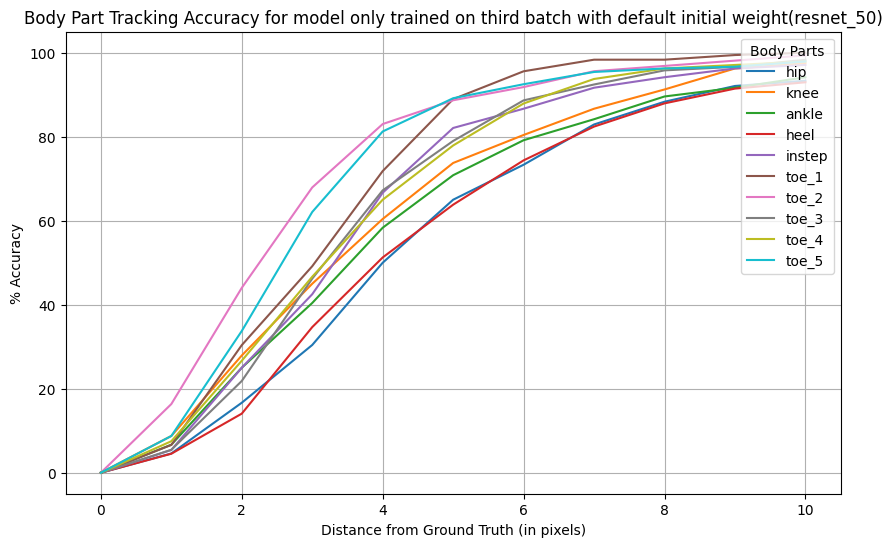

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary

# Prepare data for plotting
thresholds = sorted(my_dict.keys())
body_parts_data = {i: [] for i in range(10)}  # Create a dictionary to hold data for each body part

for threshold in thresholds:
    accuracies = my_dict[threshold]
    for index, accuracy in enumerate(accuracies):
        body_parts_data[index].append(accuracy)

# Plotting
plt.figure(figsize=(10, 6))
for part_index, accuracies in body_parts_data.items():
    plt.plot(thresholds, accuracies, label=f'{body_parts[part_index]}')

plt.xlabel('Distance from Ground Truth (in pixels)')
plt.ylabel('% Accuracy')
plt.title('Body Part Tracking Accuracy for model only trained on third batch with default initial weight(resnet_50)')
plt.legend(title="Body Parts", loc='upper right')
plt.grid(True)
plt.show()
